# Placing and orienting the aircraft orientation shape in the three-dimensional space

The plan (TODO):

* Use MATLAB to read a geometrical representation of aircraft external surface in STL (StereoLithography) format.<br/>
  STL is a file format commonly used in 3D printing and computer-aided design (CAD) software. It represents the surface geometry of a 3D object using triangular facets. Each facet is defined by its normal vector and three vertices in 3D space. STL files can be used to store and exchange 3D models between various applications.
* Use the provided function `loadAircraftSTL` that returns a triplet of matrices containing infos about shape's vertices, facets, and facets interconnections.
* Plot the faceted shape of the aircraft in a 3D space with the function `patch` and display the two reference frames $\mathcal{F}_\mathrm{E}$ and $\mathcal{F}_\mathrm{B}$.
* save the shape infos in a `.mat` file for later use.



## Initialize MATLAB

In [5]:
clearvars; close all; clc

% make the functions in this work directory available to matlab
current_dir = pwd;
addpath(genpath(current_dir));

% Set all interpreters to latex
list_factory = fieldnames(get(groot,'factory'));
index_interpreter = find(contains(list_factory,'Interpreter'));
for i = 1:length(index_interpreter)
    default_name = strrep(list_factory{index_interpreter(i)},'factory','default');
    set(groot, default_name,'latex');
end

## Load a 3D model

In [6]:
% use this factor to scale the shape
shapeScaleFactor = 1.0;

% Load shape from .mat file
shape = loadAircraftMAT('aircraft_pa24-250.mat', shapeScaleFactor);

% Display shape
fprintf('Displaying aircraft shape struct...\n');
shape

Displaying aircraft shape struct...


shape = struct with fields:
    V: [12495x3 double]
    F: [4165x3 double]
    C: [12495x1 double]

## Display the shape object with body axes

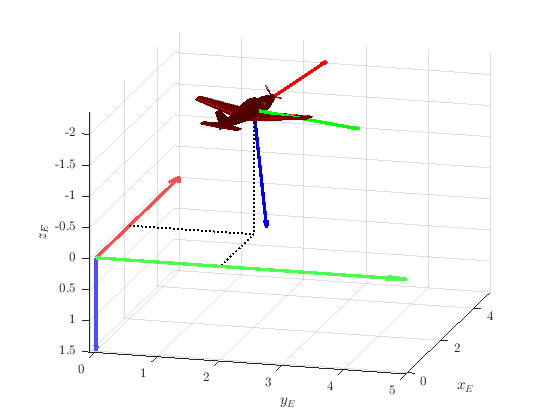

In [7]:
h_fig1 = figure(1);

grid on;
hold on;
light('Position',[1 0 -2],'Style','local');

% Trick to have Ze pointing downward and correct visualization
set(gca,'XDir','reverse');
set(gca,'ZDir','reverse');h_fig1 = figure(1);

%% Load aircraft shape
shapeScaleFactor = 1.0;
shape = loadAircraftMAT('aircraft_pa24-250.mat', shapeScaleFactor);

%% Set the aircraft in place
% Posision in Earth axes
vXYZe = [2,2,-2];
% psi, theta, phi -> 'ZYX'
vEulerAngles = convang([20,10,0],'deg','rad');
% Observer point-of-view
theView = [105 15];
% body axes settings
bodyAxesOptions.show = true;
bodyAxesOptions.magX = 2.0;
bodyAxesOptions.magY = 2.0;
bodyAxesOptions.magZ = 2.0;
bodyAxesOptions.lineWidth = 2.5;
plotBodyE(h_fig1, shape, vXYZe, vEulerAngles, bodyAxesOptions, theView);

%% Plot Earth axes
hold on;
xMax = max([abs(vXYZe(1)),5]);
yMax = max([abs(vXYZe(2)),5]);
zMax = 0.3*xMax; % max([abs(max(vXYZe(1))),0.18*xMax]);
vXYZ0 = [0,0,0];
vExtent = [xMax,yMax,zMax];
plotEarthAxes(h_fig1, vXYZ0, vExtent);

%% draw CoG coordinate helper lines
hold on;
helperLinesOptions.lineColor = 'k';
helperLinesOptions.lineWidth = 1.5;
helperLinesOptions.lineStyle = ':';
plotPoint3DHelperLines(h_fig1, vXYZe, helperLinesOptions);

xlabel('$x_E$'); ylabel('$y_E$'); zlabel('$z_E$');
